<a href="https://colab.research.google.com/github/chielgroen1998/MLOps/blob/main/datacollection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install alpha_vantage
!pip install xgboost
!pip install pandas_ta==0.3.14b0
!pip install optuna
# First install compatible versions
!pip install --upgrade pyspark==3.3.0 delta-spark==2.2.0
!pip install --upgrade numpy
!pip install --upgrade pandas_ta


In [ ]:
import pandas as pd
import numpy as np
# Fix for pandas_ta import issue
np.NaN = np.nan  # Create NaN as an alias to nan
import pandas_ta as ta
import optuna
import logging
from datetime import timedelta

from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

add more data visualizations and insights

            1. open  2. high  3. low  4. close  5. volume
date                                                     
2025-05-16    38.48  38.6000   38.30     38.58   143462.0
2025-05-15    38.82  38.9662   38.47     38.74   128908.0
2025-05-14    39.29  39.5500   39.16     39.24   120114.0
2025-05-13    38.85  39.2800   38.85     39.19   164627.0
2025-05-12    38.80  39.2600   38.80     39.01   229707.0


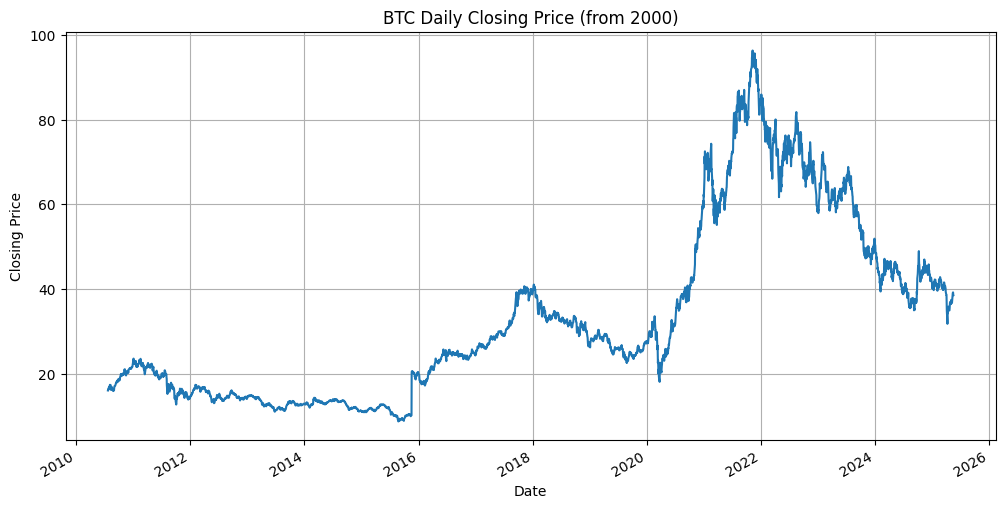

In [ ]:


# Step 2: Import libraries
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import matplotlib.pyplot as plt

# Step 3: Define your API key and symbol
api_key = 'PH8UF085L5T5MFZN'
symbol = 'LIT'  # S&P 500 Index

# Step 4: Fetch the data using Alpha Vantage API
ts = TimeSeries(key=api_key, output_format='pandas')
data, meta_data = ts.get_daily(symbol=symbol, outputsize='full')

# Step 5: Filter data from 2000 onwards
data.index = pd.to_datetime(data.index)
data = data[data.index >= '1900-01-01']

# Step 6: Display and plot the data
print(data.head())
data['4. close'].plot(figsize=(12, 6), title='BTC Daily Closing Price (from 2000)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()


In [ ]:
# Ensure the column names are correct
data.columns = ['open', 'high', 'low', 'close', 'volume']

In [ ]:
data

,open,high,low,close,volume
date,,,,,
2025-05-16,38.48,38.6000,38.3000,38.580,143462.0
2025-05-15,38.82,38.9662,38.4700,38.740,128908.0
2025-05-14,39.29,39.5500,39.1600,39.240,120114.0
2025-05-13,38.85,39.2800,38.8500,39.190,164627.0
2025-05-12,38.80,39.2600,38.8000,39.010,229707.0
...,...,...,...,...,...
2010-07-29,16.75,16.9300,16.5700,16.820,250800.0
2010-07-28,16.50,16.5000,16.2000,16.330,305300.0
2010-07-27,16.75,16.7500,16.3200,16.390,174200.0


In [ ]:
data

,open,high,low,close,volume
date,,,,,
2025-05-16,38.48,38.6000,38.3000,38.580,143462.0
2025-05-15,38.82,38.9662,38.4700,38.740,128908.0
2025-05-14,39.29,39.5500,39.1600,39.240,120114.0
2025-05-13,38.85,39.2800,38.8500,39.190,164627.0
2025-05-12,38.80,39.2600,38.8000,39.010,229707.0
...,...,...,...,...,...
2010-07-29,16.75,16.9300,16.5700,16.820,250800.0
2010-07-28,16.50,16.5000,16.2000,16.330,305300.0
2010-07-27,16.75,16.7500,16.3200,16.390,174200.0


In [ ]:
stockdata = data


stockdata

,open,high,low,close,volume
date,,,,,
2025-05-16,38.48,38.6000,38.3000,38.580,143462.0
2025-05-15,38.82,38.9662,38.4700,38.740,128908.0
2025-05-14,39.29,39.5500,39.1600,39.240,120114.0
2025-05-13,38.85,39.2800,38.8500,39.190,164627.0
2025-05-12,38.80,39.2600,38.8000,39.010,229707.0
...,...,...,...,...,...
2010-07-29,16.75,16.9300,16.5700,16.820,250800.0
2010-07-28,16.50,16.5000,16.2000,16.330,305300.0
2010-07-27,16.75,16.7500,16.3200,16.390,174200.0


In [ ]:
data

,open,high,low,close,volume
date,,,,,
2025-05-16,38.48,38.6000,38.3000,38.580,143462.0
2025-05-15,38.82,38.9662,38.4700,38.740,128908.0
2025-05-14,39.29,39.5500,39.1600,39.240,120114.0
2025-05-13,38.85,39.2800,38.8500,39.190,164627.0
2025-05-12,38.80,39.2600,38.8000,39.010,229707.0
...,...,...,...,...,...
2010-07-29,16.75,16.9300,16.5700,16.820,250800.0
2010-07-28,16.50,16.5000,16.2000,16.330,305300.0
2010-07-27,16.75,16.7500,16.3200,16.390,174200.0


In [ ]:
# ================= TREND INDICATORS =================
stockdata.ta.sma(length=100, append=True)               # Simple Moving Average (SMA) - Average price over a period
stockdata.ta.ema(length=20, append=True)               # Exponential Moving Average (EMA) - Weighted average favoring recent prices
stockdata.ta.wma(length=20, append=True)               # Weighted Moving Average (WMA) - Linear weights on recent prices
stockdata.ta.hma(length=20, append=True)               # Hull Moving Average (HMA) - Reduced lag, smooth trend indicator
stockdata.ta.vwma(length=20, append=True)              # Volume-Weighted Moving Average (VWMA) - Prices weighted by volume
stockdata.ta.macd(fast=12, slow=26, signal=9, append=True)  # Moving Average Convergence Divergence (MACD) - Trend momentum (MACD, MACDh, MACDs)
stockdata.ta.adx(length=14, append=True)               # Average Directional Index (ADX) - Trend strength (ADX, +DI, -DI)
stockdata.ta.cci(length=20, append=True)               # Commodity Channel Index (CCI) - Overbought/oversold levels
stockdata.ta.rsi(length=14, append=True)               # Relative Strength Index (RSI) - Momentum oscillator (0-100)
stockdata.ta.stoch(k=14, d=3, append=True)             # Stochastic Oscillator (STOCH) - Price momentum (K%, D%)
stockdata.ta.ichimoku(tenkan=9, kijun=26, senkou=52, append=True)  # Ichimoku Cloud - Support/resistance, trend, momentum (5 columns)
stockdata.ta.supertrend(length=7, multiplier=3, append=True)  # SuperTrend - Trend direction with ATR volatility (SUPERT, SUPERTd)
stockdata.ta.psar(step=0.02, max_step=0.2, append=True)  # Parabolic SAR (PSAR) - Trailing stop for trends

# ================= MOMENTUM INDICATORS =================
stockdata.ta.mom(length=50, append=True)               # Momentum (MOM) - Price change over period
stockdata.ta.roc(length=10, append=True)               # Rate of Change (ROC) - Percentage price change
stockdata.ta.willr(length=14, append=True)             # Williams %R (WILLR) - Overbought/oversold levels (-0 to -100)
stockdata.ta.uo(append=True)                           # Ultimate Oscillator (UO) - Multi-timeframe momentum
stockdata.ta.ao(fast=5, slow=34, append=True)          # Awesome Oscillator (AO) - Momentum based on 34/5 EMAs
stockdata.ta.kama(length=10, append=True)              # Kaufman's Adaptive MA (KAMA) - Volatility-adjusted moving average
stockdata.ta.cg(length=10, append=True)                # Center of Gravity (CG) - Price cycle indicator

# ================= VOLATILITY INDICATORS =================
stockdata.ta.bbands(length=20, std=2, append=True)     # Bollinger Bands (BBANDS) - Volatility bands (BB_U, BB_M, BB_L)
stockdata.ta.atr(length=14, append=True)               # Average True Range (ATR) - Volatility measure
stockdata.ta.kc(length=20, scalar=2, append=True)      # Keltner Channel (KC) - Volatility bands with ATR (KC_U, KC_M, KC_L)
stockdata.ta.donchian(lower_length=20, upper_length=20, append=True)  # Donchian Channel (DONCHIAN) - Price range channels
stockdata.ta.rvi(length=14, append=True)               # Relative Volatility Index (RVI) - Standard deviation-based oscillator

# ================= VOLUME INDICATORS =================
stockdata.ta.obv(append=True)                          # On-Balance Volume (OBV) - Cumulative volume flow
stockdata.ta.cmf(length=20, append=True)               # Chaikin Money Flow (CMF) - Volume-weighted money flow
stockdata.ta.adosc(fast=3, slow=10, append=True)       # AD Oscillator (ADOSC) - Accumulation/Distribution line oscillator
stockdata.ta.mfi(length=14, append=True)               # Money Flow Index (MFI) - Volume-weighted RSI
stockdata.ta.vwap(append=True)                         # Volume-Weighted Avg Price (VWAP) - Intraday benchmark price
stockdata.ta.eom(length=14, append=True)               # Ease of Movement (EOM) - Price/volume relationship
stockdata.ta.nvi(length=255, append=True)              # Negative Volume Index (NVI) - Smart money indicator

# ================= OTHER INDICATORS =================
stockdata.ta.squeeze(append=True)                      # TTM Squeeze (SQZ) - Bollinger vs Keltner volatility
stockdata.ta.fisher(length=9, append=True)             # Fisher Transform (FISHER) - Normalize prices to Gaussian
stockdata.ta.decay(length=5, mode="linear", append=True)  # Linear/Exponential Decay (DECAY) - Synthetic smoothing
stockdata.ta.decay(length=5, mode="exponential", append=True)  # Linear/Exponential Decay (DECAY) - Synthetic smoothing
stockdata.ta.vortex(length=14, append=True)            # Vortex Indicator (VTX) - Trend reversal detection
stockdata.ta.zscore(length=20, append=True)            # Z-Score (ZSCORE) - Standard deviations from mean
stockdata.ta.entropy(length=10, append=True)           # Entropy (ENTROPY) - Measure of market randomness

[!] VWAP volume series is not datetime ordered. Results may not be as expected.
[!] VWAP price series is not datetime ordered. Results may not be as expected.


<ipython-input-9-71e154bec694>:36: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[4992013.8632     4722482.1        5367896.1893     ... 2475540.92333333
 4206752.         2871977.33333333]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  stockdata.ta.mfi(length=14, append=True)               # Money Flow Index (MFI) - Volume-weighted RSI
<ipython-input-9-71e154bec694>:36: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[6438013.21333333 8963932.83       2129644.93733333 ... 4989619.66666667
 2704620.8        7408616.52666667]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  stockdata.ta.mfi(length=14, append=True)               # Money Flow Index (MFI) - Volume-weighted RSI
<ipython-input-9-71e154bec694>:44: FutureWarning: Series.__getitem__ t

,ENTP_10
date,
2025-05-16,NaN
2025-05-15,NaN
2025-05-14,NaN
2025-05-13,NaN
2025-05-12,NaN
...,...
2010-07-29,3.350021
2010-07-28,3.343010
2010-07-27,3.329411


after engineering move to pyspark, describe in report why

transforming (remove nulls after cuz its about loading the data in first)

In [ ]:
pd.set_option('display.max_columns', None)
stockdata


,open,high,low,close,volume,SMA_100,EMA_20,WMA_20,HMA_20,VWMA_20,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,ADX_14,DMP_14,DMN_14,CCI_20_0.015,RSI_14,STOCHk_14_3_3,STOCHd_14_3_3,ISA_9,ISB_26,ITS_9,IKS_26,ICS_26,SUPERT_7_3.0,SUPERTd_7_3.0,SUPERTl_7_3.0,SUPERTs_7_3.0,PSARl_0.02_0.2,PSARs_0.02_0.2,PSARaf_0.02_0.2,PSARr_0.02_0.2,MOM_50,ROC_10,WILLR_14,UO_7_14_28,AO_5_34,KAMA_10_2_30,CG_10,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0,ATRr_14,KCLe_20_2.0,KCBe_20_2.0,KCUe_20_2.0,DCL_20_20,DCM_20_20,DCU_20_20,RVI_14,OBV,CMF_20,ADOSC_3_10,MFI_14,VWAP_D,EOM_14_100000000,NVI_255,SQZ_20_2.0_20_1.5,SQZ_ON,SQZ_OFF,SQZ_NO,FISHERT_9_1,FISHERTs_9_1,LDECAY_5,VTXP_14,VTXM_14,ZS_20,ENTP_10
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2025-05-16,38.48,38.6000,38.3000,38.580,143462.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.01,0.000000,1,NaN,NaN,NaN,NaN,0.02,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,143462.0,NaN,NaN,NaN,38.493333,NaN,3796.692632,NaN,0,0,1,NaN,NaN,38.580,NaN,NaN,NaN,NaN
2025-05-15,38.82,38.9662,38.4700,38.740,128908.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.82,NaN,1,NaN,NaN,15.679900,NaN,0.04,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,272370.0,NaN,NaN,NaN,38.725400,NaN,3796.692632,NaN,0,0,1,NaN,NaN,38.740,NaN,NaN,NaN,NaN
2025-05-14,39.29,39.5500,39.1600,39.240,120114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.81,NaN,1,NaN,NaN,16.611352,NaN,0.06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,392484.0,NaN,NaN,NaN,39.316667,NaN,3796.692632,NaN,0,0,1,NaN,NaN,39.240,NaN,NaN,NaN,NaN
2025-05-13,38.85,39.2800,38.8500,39.190,164627.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.92,NaN,1,NaN,NaN,17.987671,NaN,0.06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,227857.0,NaN,NaN,NaN,39.106667,NaN,3796.692632,NaN,0,0,1,NaN,NaN,39.190,NaN,NaN,NaN,NaN
2025-05-12,38.80,39.2600,38.8000,39.010,229707.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.07,NaN,1,NaN,NaN,19.281411,NaN,0.06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1850.0,NaN,NaN,NaN,39.023333,NaN,3796.692632,NaN,0,0,1,NaN,NaN,39.010,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-07-29,16.75,16.9300,16.5700,16.820,250800.0,18.880411,16.916799,16.888908,17.253265,16.774012,-0.070124,0.075057,-0.145181,25.145325,21.256482,29.155281,9.626755,46.484655,51.942740,59.372870,17.8950,19.150,17.04005,16.63,NaN,16.015239,1,16.015239,NaN,16.424227,NaN,0.04,0,-2.3800,2.874618,-49.693252,53.641863,0.077669,16.719329,-5.505306,15.847704,16.726995,17.606286,10.513441,0.552886,0.424648,16.068336,16.916799,17.765262,15.6300,16.63000,17.63,42.755533,-19990025.0,0.122310,124037.878787,56.066793,16.773333,-39.672951,965.348950,0.480917,0,1,0,0.048185,0.567604,16.820,0.761542,0.794881,0.206189,3.350021
2010-07-28,16.50,16.5000,16.2000,16.330,305300.0,18.831711,16.860913,16.851099,17.120973,16.754778,-0.111564,0.026894,-0.138457,25.175296,19.110211,32.237106,-75.810839,39.023665,37.218814,48.738923,17.6950,19.010,16.91500,16.63,NaN,16.015239,1,16.015239,NaN,NaN,17.630000,0.02,1,-2.3436,-0.121713,-79.754601,48.795503,-0.038596,16.717474,-5.546841,15.906288,16.743095,17.579902,9.995852,0.253172,0.438602,15.975161,16.860913,17.746666,15.9600,16.79500,17.63,36.762590,-20295325.0,0.056977,112091.820937,49.678509,16.343333,-34.003445,965.348950,0.326333,0,1,0,-0.505416,0.048185,16.620,0.728395,0.807068,-0.962313,3.343010
2010-07-27,16.75,16.7500,16.3200,16.390

removing rows or mean imputation without a rolling window is not smart because of the timeseries nature of stocks, it would ruin indications of growing or shrinking trends in price


In [ ]:
filling on NaN's


# def fill_nan_with_rolling_median(df, window_size=21): # Use an odd window size to center
#     if window_size % 2 == 0:
#         window_size += 1
#     if window_size < 3:
#         window_size = 3

#     center_offset = (window_size - 1) // 2
#     df_filled = df.apply(lambda col: col.fillna(col.rolling(window=window_size, center=True).median()))


#     df_filled = df_filled.fillna(df_filled.median())

#     return df_filled

# train_data_filled = fill_nan_with_rolling_median(train_data.copy(), window_size=21)
# test_data_filled = fill_nan_with_rolling_median(test_data.copy(), window_size=21)

# print("NaN counts in train_data_filled after rolling median imputation:")
# print(train_data_filled.isnull().sum())

# print("\nNaN counts in test_data_filled after rolling median imputation:")
# print(test_data_filled.isnull().sum())

# # Now you can save these filled dataframes to CSVs and load them into PySpark
# train_data_filled.to_csv("train_filled.csv", index=True)
# test_data_filled.to_csv("test_filled.csv", index=True)

# # Load filled data from CSV into PySpark DataFrame
# train_spark_df = spark.read.csv("train_filled.csv", header=True, inferSchema=True)
# test_spark_df = spark.read.csv("test_filled.csv", header=True, inferSchema=True)

# # Show schema to verify data types
# train_spark_df.printSchema()
# test_spark_df.printSchema()

# # Show first few rows
# train_spark_df.show(5)
# test_spark_df.show(5)

NaN counts in train_data_filled after rolling median imputation:
open              0
high              0
low               0
close             0
volume            0
                 ..
VTXM_14           0
ZS_20             0
ENTP_10           0
conditions_met    0
label             0
Length: 73, dtype: int64

NaN counts in test_data_filled after rolling median imputation:
open              0
high              0
low               0
close             0
volume            0
                 ..
VTXM_14           0
ZS_20             0
ENTP_10           0
conditions_met    0
label             0
Length: 73, dtype: int64
root
 |-- date: timestamp (nullable = true)
 |-- open: double (nullable = true)
 |-- high: double (nullable = true)
 |-- low: double (nullable = true)
 |-- close: double (nullable = true)
 |-- volume: double (nullable = true)
 |-- SMA_100: double (nullable = true)
 |-- EMA_20: double (nullable = true)
 |-- WMA_20: double (nullable = true)
 |-- HMA_20: double (nullable = true)
 

move from SKLEARN to pysparkML

In [ ]:
train_spark_df.printSchema()
test_spark_df.printSchema()

root
 |-- date: timestamp (nullable = true)
 |-- open: double (nullable = true)
 |-- high: double (nullable = true)
 |-- low: double (nullable = true)
 |-- close: double (nullable = true)
 |-- volume: double (nullable = true)
 |-- SMA_100: double (nullable = true)
 |-- EMA_20: double (nullable = true)
 |-- WMA_20: double (nullable = true)
 |-- HMA_20: double (nullable = true)
 |-- VWMA_20: double (nullable = true)
 |-- MACD_12_26_9: double (nullable = true)
 |-- MACDh_12_26_9: double (nullable = true)
 |-- MACDs_12_26_9: double (nullable = true)
 |-- ADX_14: double (nullable = true)
 |-- DMP_14: double (nullable = true)
 |-- DMN_14: double (nullable = true)
 |-- CCI_20_0.015: double (nullable = true)
 |-- RSI_14: double (nullable = true)
 |-- STOCHk_14_3_3: double (nullable = true)
 |-- STOCHd_14_3_3: double (nullable = true)
 |-- ISA_9: double (nullable = true)
 |-- ISB_26: double (nullable = true)
 |-- ITS_9: double (nullable = true)
 |-- IKS_26: double (nullable = true)
 |-- ICS_26: